# Classify patient condition with k-nearest neighbors in python
05-classify-patient-condition-w-knn-in-python

In [20]:
# Set-up libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
# Read data into dataframe
df = pd.read_csv('../00-Datasets/biomech.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [5]:
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [6]:
df.sample(6)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
223,69.398818,18.898407,75.966361,50.500411,103.582540,-0.443661,Normal
264,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,Normal
255,67.538182,14.655042,58.001429,52.883139,123.632260,25.970206,Normal
116,70.484104,12.489488,62.417142,57.994617,114.190049,56.902448,Spondylolisthesis
15,44.318907,12.537992,36.098763,31.780915,124.115836,5.415825,Hernia
28,44.551012,21.931147,26.785916,22.619865,111.072920,2.652321,Hernia


In [10]:
df['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [13]:
# Check for missing values
df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [8]:
# Check for duplicate values
df.duplicated().sum()

0

In [11]:
# Explore tabular summary
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


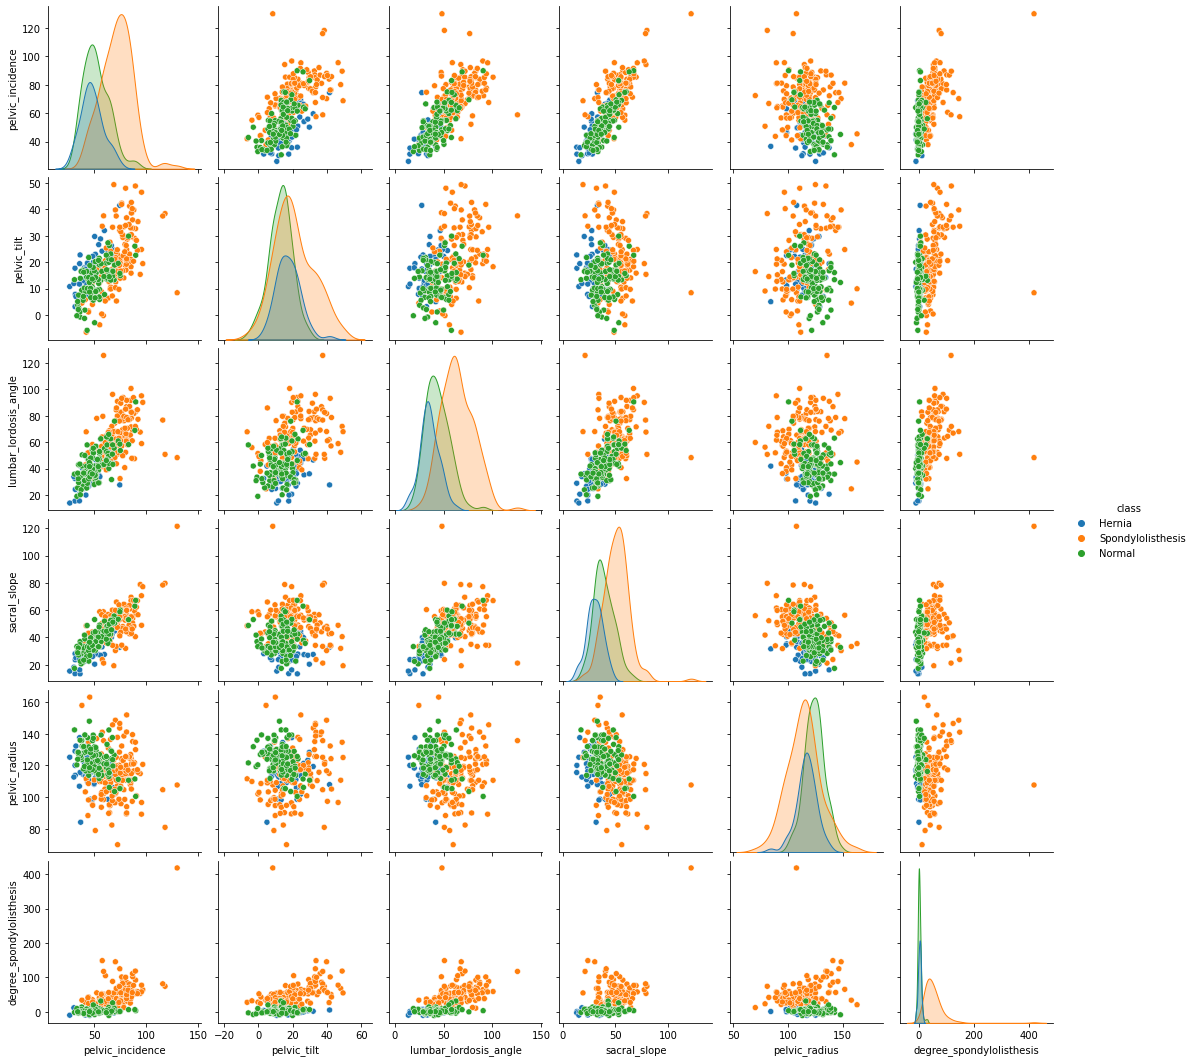

In [14]:
# Explore visual summaries
sns.pairplot(df, hue='class')

In [16]:
# Split data into 80% train and 20% test
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

In [21]:
# Build model
classifier = KNeighborsClassifier(n_neighbors=3)
knn = classifier.fit(X_train, y_train)

In [23]:
# Feed test data to model
y_predict = classifier.predict(X_test)

actual_vs_predict = pd.DataFrame({'Actual': y_test,
                                 'Predict': y_predict})

actual_vs_predict.head(10)

,Actual,Predict
300,Normal,Normal
145,Spondylolisthesis,Spondylolisthesis
302,Normal,Hernia
222,Normal,Spondylolisthesis
52,Hernia,Hernia
279,Normal,Normal
22,Hernia,Normal
171,Spondylolisthesis,Normal
191,Spondylolisthesis,Spondylolisthesis
245,Normal,Normal


In [24]:
# Evaluate model
print(classification_report(y_test, y_predict))

                   precision    recall  f1-score   support

           Hernia       0.56      0.38      0.45        13
           Normal       0.57      0.68      0.62        19
Spondylolisthesis       0.93      0.93      0.93        30

         accuracy                           0.74        62
        macro avg       0.68      0.67      0.67        62
     weighted avg       0.74      0.74      0.74        62



## Notes
* We wanted to classify the condition of biomechanical patients.
* Our dataset had 310 patient records and 7 features including 'pelvic_incidence', 'pelviv_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', and 'class', of which 6 are of type float and 1 is of type object.
* A quick inspection showed that there are no missing values and no duplicate records.
* The dataset was split into 80% train and 20% test sets. No validation set was created or used. No hyperparameter tuning occurred.
* We built, trained, and tested a k-nearest neighbor classifier. 
* We evaluated our model using ground truth and several metrics including precision, recall, and f1-score.